# Juypter Notebook

The following cell import common libaries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a simple plot.

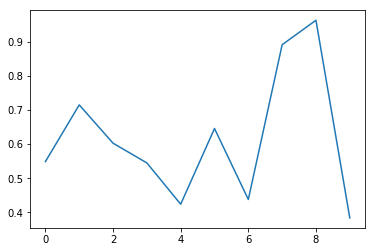

In [5]:
np.random.seed(0)
data = np.random.rand(10)
plt.plot(data)

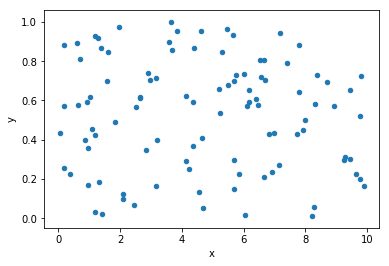

In [9]:
n = 100
np.random.seed(0)
df = pd.DataFrame({'x':10*np.random.rand(n), 'y':np.random.rand(n)})
df.plot.scatter('x', 'y')

## DataFrame apply/applymap; Series appy/map function

In [5]:
df = pd.DataFrame({'a':[1,2,3], 'b':[3,2,1]})

In [6]:
df.apply(np.sqrt)

,a,b
0,1.000000,1.732051
1,1.414214,1.414214
2,1.732051,1.000000


In [7]:
df.applymap(np.sqrt)

,a,b
0,1.000000,1.732051
1,1.414214,1.414214
2,1.732051,1.000000


In [8]:
df.apply(np.sum)

a    6
b    6
dtype: int64

In [9]:
df.apply(np.sum, broadcast=True)

,a,b
0,6,6
1,6,6
2,6,6


Add row/column to DataFrame

In [10]:
df.append({'a':4,'b':4}, ignore_index=True)

,a,b
0,1,3
1,2,2
2,3,1
3,4,4


In [11]:
ts = pd.Series([5, 5], ['a', 'b'], name='test')
df.append(ts)

,a,b
0,1,3
1,2,2
2,3,1
test,5,5


In [92]:
ts = pd.Series(range(3))

In [93]:
ts.map(lambda x: x*x)

0    0
1    1
2    4
dtype: int64

In [94]:
ts.apply(lambda x: (x, x))

0    (0, 0)
1    (1, 1)
2    (2, 2)
dtype: object

In [102]:
ts.apply(lambda x: pd.Series({'x':x, 'y':x*x}))

,x,y
0,0,0
1,1,1
2,2,4


## DataFrame groupby + agg/transform/apply functions

In [12]:
df['c']=['M', 'F', 'F']
df

,a,b,c
0,1,3,M
1,2,2,F
2,3,1,F


In [13]:
df.groupby('c', group_keys=True).sum()

,a,b
c,,
F,5,3
M,1,3


In [14]:
df.groupby('c').aggregate([np.sum, np.mean, np.std])

a                  b               
  sum mean       std sum mean       std
c                                      
F   5  2.5  0.707107   3  1.5  0.707107
M   1  1.0       NaN   3  3.0       NaN

In [15]:
df.groupby('c').aggregate({'a':np.sum, 'b':np.mean})

,a,b
c,,
F,5,1.5
M,1,3.0


In [16]:
df.groupby('c').transform(lambda x: x - x.mean())

,a,b
0,0.0,0.0
1,-0.5,0.5
2,0.5,-0.5


In [17]:
df

,a,b,c
0,1,3,M
1,2,2,F
2,3,1,F


In [18]:
df.groupby('c').apply(lambda x: x['a'])

c   
F  1    2
   2    3
M  0    1
Name: a, dtype: int64

In [19]:
df.groupby('c').apply(lambda x: x.describe())

a         b
c                          
F count  2.000000  2.000000
  mean   2.500000  1.500000
  std    0.707107  0.707107
  min    2.000000  1.000000
  25%    2.250000  1.250000
  50%    2.500000  1.500000
  75%    2.750000  1.750000
  max    3.000000  2.000000
M count  1.000000  1.000000
  mean   1.000000  3.000000
  std         NaN       NaN
  min    1.000000  3.000000
  25%    1.000000  3.000000
  50%    1.000000  3.000000
  75%    1.000000  3.000000
  max    1.000000  3.000000

In [20]:
df.groupby('c').apply(lambda x: x.describe()).index

MultiIndex(levels=[['F', 'M'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]],
           names=['c', None])

In [21]:
df.groupby('c').apply(lambda x: x.describe()).loc[('F', 'count')]

a    2.0
b    2.0
Name: (F, count), dtype: float64

In [22]:
df.groupby('c').apply(lambda x: x.describe()).loc[('F', 'count')]['a']

2.0

In [23]:
df.groupby('c').apply(lambda x: x.describe()).iloc[(1, 0)]

2.5

In [24]:
df.groupby('c').apply(lambda x: x['a'])

c   
F  1    2
   2    3
M  0    1
Name: a, dtype: int64

## magic command: load

In [25]:
# %load e:\mydoc\bitbucket\work\HBKNote\aaa.py
#!/usr/bin/env python

class AAA:
    def __init__(self, x):
        self._x = x

Instance = AAA('hoha')        

   
    


In [26]:
Instance

Tips: Ctrl+Shift+p brings up shortcut search box

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [27]:
!echo haha

haha


# DataFrame to/from from np.array

In [82]:
a = np.array([np.arange(5), np.arange(5) + 10])
a

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

In [83]:
df = pd.DataFrame(a, index=list('xy'), columns=list('ABCDE'))
df

,A,B,C,D,E
x,0,1,2,3,4
y,10,11,12,13,14


In [86]:
df.values

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

In [87]:
df.values * df.values

array([[  0,   1,   4,   9,  16],
       [100, 121, 144, 169, 196]])

In [84]:
m = df.as_matrix()
m

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

In [31]:
mm = np.asmatrix(m)
mm

matrix([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]])

In [32]:
mm*mm.T

matrix([[ 30, 130],
        [130, 730]])

In [33]:
m[1,1]=-11
m

array([[  0,   1,   2,   3,   4],
       [ 10, -11,  12,  13,  14]])

In [34]:
mm

matrix([[  0,   1,   2,   3,   4],
        [ 10, -11,  12,  13,  14]])

In [35]:
df2 = pd.DataFrame(mm, index=list('xy'), columns=list('abcde'))
df2

,a,b,c,d,e
x,0,1,2,3,4
y,10,-11,12,13,14


In [36]:
# a, df, df2, m, mm all shared the same data.

df2.iloc[1,1]=0
df2
df

,A,B,C,D,E
x,0,1,2,3,4
y,10,0,12,13,14


## Series/DataFrame windowed calculation

In [38]:
s = pd.Series([9, 8, 7, 5, 19, 1, 4.2, 3.3])
s

0     9.0
1     8.0
2     7.0
3     5.0
4    19.0
5     1.0
6     4.2
7     3.3
dtype: float64

In [40]:
dir(s.rolling(4))

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_agg_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_apply',
 '_attributes',
 '_builtin_table',
 '_center_window',
 '_constructor',
 '_convert_freq',
 '_create_blocks',
 '_cython_table',
 '_dir_additions',
 '_dir_deletions',
 '_get_index',
 '_get_window',
 '_gotitem',
 '_internal_names',
 '_internal_names_set',
 '_is_builtin_func',
 '_is_cython_func',
 '_obj_with_exclusions',
 '_on',
 '_prep_values',
 '_reset_cache',
 '_selected_obj',
 '_selection',
 '_selection_list',
 '_selection_name',
 '_shallow_copy',
 '_try_aggregate_string_function',
 '_validate_f

In [42]:
s.rolling(4).sum()

0     NaN
1     NaN
2     NaN
3    29.0
4    39.0
5    32.0
6    29.2
7    27.5
dtype: float64

In [52]:
s.rolling(4).apply(lambda x: sum(x)/len(x))

0      NaN
1      NaN
2      NaN
3    7.250
4    9.750
5    8.000
6    7.300
7    6.875
dtype: float64

In [50]:
s.rolling(4).aggregate(lambda x: sum(x))

0     NaN
1     NaN
2     NaN
3    29.0
4    39.0
5    32.0
6    29.2
7    27.5
dtype: float64

In [54]:
s = pd.Series([1] * 5)

In [55]:
s.cumsum()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [56]:
s.expanding(2).sum()

0    NaN
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [57]:
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int32

In [58]:
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int32

In [60]:
series.rolling(window=2,center=False).mean()

2000-01-01 00:00:00    NaN
2000-01-01 00:01:00    0.5
2000-01-01 00:02:00    1.5
2000-01-01 00:03:00    2.5
2000-01-01 00:04:00    3.5
2000-01-01 00:05:00    4.5
2000-01-01 00:06:00    5.5
2000-01-01 00:07:00    6.5
2000-01-01 00:08:00    7.5
Freq: T, dtype: float64

In [61]:
series.ewm(com=0.5).mean()

2000-01-01 00:00:00    0.000000
2000-01-01 00:01:00    0.750000
2000-01-01 00:02:00    1.615385
2000-01-01 00:03:00    2.550000
2000-01-01 00:04:00    3.520661
2000-01-01 00:05:00    4.508242
2000-01-01 00:06:00    5.503202
2000-01-01 00:07:00    6.501220
2000-01-01 00:08:00    7.500457
Freq: T, dtype: float64

In [62]:
df2 = pd.DataFrame({'x1': series, 'x2':series.ewm(com=0.5).mean()})

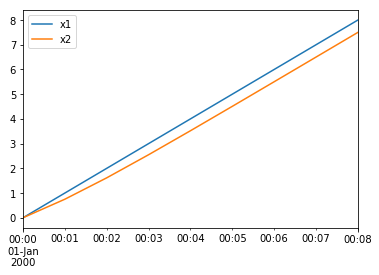

In [64]:
df2.plot()

In [69]:
index = pd.date_range('1/1/2000', periods=9, freq='T')
s1 = pd.Series(range(9), index=index)
s2 = pd.Series(range(9, 0, -1), index=index)
#df2 = pd.DataFrame({'s1':s1, 's2':s2})
df2 = pd.DataFrame([s1, s2]).transpose()
df2

,0,1
2000-01-01 00:00:00,0,9
2000-01-01 00:01:00,1,8
2000-01-01 00:02:00,2,7
2000-01-01 00:03:00,3,6
2000-01-01 00:04:00,4,5
2000-01-01 00:05:00,5,4
2000-01-01 00:06:00,6,3
2000-01-01 00:07:00,7,2
2000-01-01 00:08:00,8,1


In [74]:
m = df2.rolling(window=2,center=False).mean()

In [75]:
v = df2.rolling(window=2,center=False).std()

In [78]:
df3 = pd.concat([df2, m, v], axis=1)
df3.columns = ['x', 'y', 'mx', 'my', 'vx', 'vy']

In [79]:
df3

,x,y,mx,my,vx,vy
2000-01-01 00:00:00,0,9,NaN,NaN,NaN,NaN
2000-01-01 00:01:00,1,8,0.5,8.5,0.707107,0.707107
2000-01-01 00:02:00,2,7,1.5,7.5,0.707107,0.707107
2000-01-01 00:03:00,3,6,2.5,6.5,0.707107,0.707107
2000-01-01 00:04:00,4,5,3.5,5.5,0.707107,0.707107
2000-01-01 00:05:00,5,4,4.5,4.5,0.707107,0.707107
2000-01-01 00:06:00,6,3,5.5,3.5,0.707107,0.707107
2000-01-01 00:07:00,7,2,6.5,2.5,0.707107,0.707107
2000-01-01 00:08:00,8,1,7.5,1.5,0.707107,0.707107


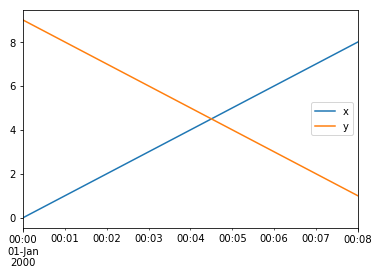

In [81]:
df3[['x','y']].plot()

## Gather and Spread

In [104]:
df = pd.DataFrame({
    'A':{0:'a',1:'b',2:'c'},
    'B':{0:1,1:3,2:5},
    'C':{0:2,1:4,2:6}    
})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [110]:
df2 = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])
df2

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [116]:
df3 = df2.pivot(index='A', columns='variable', values='value').reset_index()
df3

variable,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [115]:
df3.columns

Index(['A', 'B', 'C'], dtype='object', name='variable')

In [119]:
# vectorize
df4 = df.stack()
df4

0  A    a
   B    1
   C    2
1  A    b
   B    3
   C    4
2  A    c
   B    5
   C    6
dtype: object

In [121]:
# matrixize
df5 = df4.unstack()
df5

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [123]:
df4.index

MultiIndex(levels=[[0, 1, 2], ['A', 'B', 'C']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [127]:
df4.loc[0,'A']

'a'

In [130]:
df4.loc[0,]

A    a
B    1
C    2
dtype: object

In [131]:
df4.index.get_level_values(0)

Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype='int64')

In [132]:
df5 = df4.reset_index()

,level_0,level_1,0
0,0,A,a
1,0,B,1
2,0,C,2
3,1,A,b
4,1,B,3
5,1,C,4
6,2,A,c
7,2,B,5
8,2,C,6


In [138]:
df5.shape

(3, 3)

In [139]:
df5.index

Int64Index([0, 1, 2], dtype='int64')

In [140]:
df5.columns

Index(['A', 'B', 'C'], dtype='object')

In [145]:
df5.loc[1]['A']

'b'

## Reshape and Tile 

In [12]:
a = np.arange(8)
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [14]:
np.reshape(a, [2, 4])

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [19]:
np.reshape(a, [2, 4], 'c')

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [18]:
np.reshape(a, [2, 4], 'f')

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

In [3]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [23]:
np.tile(a, [3,2])

array([[1, 2, 1, 2],
       [3, 4, 3, 4],
       [1, 2, 1, 2],
       [3, 4, 3, 4],
       [1, 2, 1, 2],
       [3, 4, 3, 4]])

In [24]:
a.reshape(-1)  # retunns a view (by changing the stride)

array([1, 2, 3, 4])

In [25]:
np.ravel(a)  # 1d view


array([1, 2, 3, 4])

In [4]:
a.flatten()  # 1d copy

array([1, 2, 3, 4])

In [35]:
np.r_[[1,3,4], [3,4]]

array([1, 3, 4, 3, 4])

In [37]:
np.c_[[1,1,],[3,3,]]

array([[1, 3],
       [1, 3]])

## Broadcasting and einsum

In [38]:
x = np.arange(4)
x

array([0, 1, 2, 3])

In [40]:
y = np.ones(5)
y

array([ 1.,  1.,  1.,  1.,  1.])

In [42]:
z = np.ones((3,4))
z

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [43]:
x+z

array([[ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.]])

In [44]:
x.reshape(4,1) + y

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.]])

In [46]:
a = np.array([0,1,2])
a

array([0, 1, 2])

In [48]:
b = np.array(np.arange(12).reshape((3,4)))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

einsum notation:

index_to_arr1, index_to_arry2 -> index_to_ouput    

    - output array index (outer loop)
    - input index not in output index are sum index (innerloop)
    - repeated index on input array means sum (innerloop)
    - when '->' is omitted        
        - non repeated index appears in alphebetic order
    - '...' means do not cared index, must appear in both input and output

In [49]:
(a[:,np.newaxis]*b).sum(axis=1)

array([ 0, 22, 76])

In [51]:
np.einsum('i,ij->i', a, b)

array([ 0, 22, 76])

In [52]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [53]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [55]:
c = np.arange(6).reshape(2,3)
c

array([[0, 1, 2],
       [3, 4, 5]])

In [56]:
np.einsum('ii', a)  # np.trace(a)

60

In [59]:
np.einsum('ii->i', a)  # np.diag(a)

array([ 0,  6, 12, 18, 24])

In [60]:
np.einsum('ij,j', a, b)

array([ 30,  80, 130, 180, 230])

In [61]:
np.einsum('ij,j->i', a, b)

array([ 30,  80, 130, 180, 230])

In [62]:
np.einsum('...j,j->...', a, b)

array([ 30,  80, 130, 180, 230])

In [63]:
np.dot(a,b)

array([ 30,  80, 130, 180, 230])

In [64]:
c

array([[0, 1, 2],
       [3, 4, 5]])

In [65]:
np.einsum('ji', c)  # c.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [66]:
c.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [67]:
np.einsum('...,...', 3, c) # 3*c

array([[ 0,  3,  6],
       [ 9, 12, 15]])

In [68]:
np.einsum(',ij', 3, c)

array([[ 0,  3,  6],
       [ 9, 12, 15]])

In [69]:
b

array([0, 1, 2, 3, 4])

In [72]:
np.einsum('i,i', b, b)  # np.inner(b,b)

30

In [73]:
np.inner(b,b)

30

In [75]:
np.einsum('i,j', np.arange(2) + 1, b)  # np.outer(np.arange(2)+1, b)

array([[0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8]])

In [78]:
np.outer(np.arange(2)+1, b)

array([[0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8]])

In [79]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [81]:
np.einsum('i...->...', a)  # ... means j

array([50, 55, 60, 65, 70])

In [82]:
a.sum(axis=0)

array([50, 55, 60, 65, 70])

In [83]:
a = np.arange(60.).reshape(3,4,5)
a

array([[[  0.,   1.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.,   9.],
        [ 10.,  11.,  12.,  13.,  14.],
        [ 15.,  16.,  17.,  18.,  19.]],

       [[ 20.,  21.,  22.,  23.,  24.],
        [ 25.,  26.,  27.,  28.,  29.],
        [ 30.,  31.,  32.,  33.,  34.],
        [ 35.,  36.,  37.,  38.,  39.]],

       [[ 40.,  41.,  42.,  43.,  44.],
        [ 45.,  46.,  47.,  48.,  49.],
        [ 50.,  51.,  52.,  53.,  54.],
        [ 55.,  56.,  57.,  58.,  59.]]])

In [84]:
b = np.arange(24.).reshape(4,3,2)
b

array([[[  0.,   1.],
        [  2.,   3.],
        [  4.,   5.]],

       [[  6.,   7.],
        [  8.,   9.],
        [ 10.,  11.]],

       [[ 12.,  13.],
        [ 14.,  15.],
        [ 16.,  17.]],

       [[ 18.,  19.],
        [ 20.,  21.],
        [ 22.,  23.]]])

In [85]:
np.einsum('ijk,jil->kl', a, b)

array([[ 4400.,  4730.],
       [ 4532.,  4874.],
       [ 4664.,  5018.],
       [ 4796.,  5162.],
       [ 4928.,  5306.]])

In [86]:
a = np.arange(6).reshape((3,2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [88]:
b = np.arange(12).reshape((4,3))
b

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [89]:
np.einsum('ki,jk->ij', a,b)  # (b*a).T

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [94]:
np.einsum('ki,...k->i...', a, b)  # ... means j

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [95]:
np.einsum('k...,jk->...j', a, b)  # ... means i

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [92]:
(np.dot(b, a)).T

array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

In [96]:
a = np.arange(6).reshape((3,2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [110]:
np.einsum('...j,...j->...j', a, a)

array([[ 0,  1],
       [ 4,  9],
       [16, 25]])

In [111]:
np.einsum('...,...->...', a, a)

array([[ 0,  1],
       [ 4,  9],
       [16, 25]])

In [112]:
a = np.arange(8).reshape((2,2,2))
a

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [116]:
np.einsum('...ij,...jk->...ik', a, a)

array([[[ 2,  3],
        [ 6, 11]],

       [[46, 55],
        [66, 79]]])

In [117]:
np.einsum('aij,ajk->ik', a, a)

array([[48, 58],
       [72, 90]])

## shift/roll

In [121]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [122]:
np.roll(x, -2)

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [123]:
y=np.roll(x,2)
y[0:2] = -1
y

array([-1, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [124]:
s=pd.Series([5,4,3,2,1], index=[1,2,3,4,5])
s

1    5
2    4
3    3
4    2
5    1
dtype: int64

In [127]:
df = pd.concat([s, s.shift(), s.shift(2)], axis=1)
df.columns = ['orig', 'lag1', 'lag2']
df

,orig,lag1,lag2
1,5,NaN,NaN
2,4,5.0,NaN
3,3,4.0,5.0
4,2,3.0,4.0
5,1,2.0,3.0


## np array stack/concatenate/split/block

In [128]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [131]:
b = np.array([[5,6]])
b

array([[5, 6]])

In [132]:
np.concatenate((a,b), axis=0)

array([[0, 1],
       [2, 3],
       [5, 6]])

In [135]:
np.vstack((a,b))

array([[0, 1],
       [2, 3],
       [5, 6]])

In [136]:
np.hstack((a,b.T))

array([[0, 1, 5],
       [2, 3, 6]])

In [137]:
np.random.seed(0)
arr = [np.random.randn(3,4) for _ in range(10)]
np.stack(arr, axis=0).shape

(10, 3, 4)

In [138]:
x = np.arange(16.0).reshape(4,4)
x

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.],
       [ 12.,  13.,  14.,  15.]])

In [139]:
np.hsplit(x, 2)

[array([[  0.,   1.],
        [  4.,   5.],
        [  8.,   9.],
        [ 12.,  13.]]), array([[  2.,   3.],
        [  6.,   7.],
        [ 10.,  11.],
        [ 14.,  15.]])]

In [141]:
np.hsplit(x, [3,5])

[array([[  0.,   1.,   2.],
        [  4.,   5.,   6.],
        [  8.,   9.,  10.],
        [ 12.,  13.,  14.]]), array([[  3.],
        [  7.],
        [ 11.],
        [ 15.]]), array([], shape=(4, 0), dtype=float64)]

In [142]:
a = np.eye(2)*2
b = np.eye(3)*3

In [148]:
np.__version__

# np.block([
#            [A,              np.zeros((2,3))],
#            [np.ones((3,2)), B          ]
#         ])  # 1.13.0

'1.12.1'

In [149]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

## matrix and array

In [8]:
a = np.mat('1,2;3,4')
a

matrix([[1, 2],
        [3, 4]])

In [10]:
a = np.matrix('1,2;3,4')
a

matrix([[1, 2],
        [3, 4]])

In [14]:
b = np.asarray(a)
b

In [16]:
np.asmatrix(b)

matrix([[1, 2],
        [3, 4]])

## tensordot

take two input arrays and sum reduction along respective axes. non-reduced axes are spread across the output array

In [17]:
a = np.arange(60).reshape((2,6,5))
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [21]:
b = np.arange(24, 0, -1).reshape((3,2,4))
b


array([[[24, 23, 22, 21],
        [20, 19, 18, 17]],

       [[16, 15, 14, 13],
        [12, 11, 10,  9]],

       [[ 8,  7,  6,  5],
        [ 4,  3,  2,  1]]])

In [22]:
np.tensordot(a, b, axes=((0,),(1,)))

array([[[[ 600,  570,  540,  510],
         [ 360,  330,  300,  270],
         [ 120,   90,   60,   30]],

        [[ 644,  612,  580,  548],
         [ 388,  356,  324,  292],
         [ 132,  100,   68,   36]],

        [[ 688,  654,  620,  586],
         [ 416,  382,  348,  314],
         [ 144,  110,   76,   42]],

        [[ 732,  696,  660,  624],
         [ 444,  408,  372,  336],
         [ 156,  120,   84,   48]],

        [[ 776,  738,  700,  662],
         [ 472,  434,  396,  358],
         [ 168,  130,   92,   54]]],


       [[[ 820,  780,  740,  700],
         [ 500,  460,  420,  380],
         [ 180,  140,  100,   60]],

        [[ 864,  822,  780,  738],
         [ 528,  486,  444,  402],
         [ 192,  150,  108,   66]],

        [[ 908,  864,  820,  776],
         [ 556,  512,  468,  424],
         [ 204,  160,  116,   72]],

        [[ 952,  906,  860,  814],
         [ 584,  538,  492,  446],
         [ 216,  170,  124,   78]],

        [[ 996,  948,  900,  852],


In [23]:
np.einsum('ijk,lin', a, b)

array([[[[ 600,  570,  540,  510],
         [ 360,  330,  300,  270],
         [ 120,   90,   60,   30]],

        [[ 644,  612,  580,  548],
         [ 388,  356,  324,  292],
         [ 132,  100,   68,   36]],

        [[ 688,  654,  620,  586],
         [ 416,  382,  348,  314],
         [ 144,  110,   76,   42]],

        [[ 732,  696,  660,  624],
         [ 444,  408,  372,  336],
         [ 156,  120,   84,   48]],

        [[ 776,  738,  700,  662],
         [ 472,  434,  396,  358],
         [ 168,  130,   92,   54]]],


       [[[ 820,  780,  740,  700],
         [ 500,  460,  420,  380],
         [ 180,  140,  100,   60]],

        [[ 864,  822,  780,  738],
         [ 528,  486,  444,  402],
         [ 192,  150,  108,   66]],

        [[ 908,  864,  820,  776],
         [ 556,  512,  468,  424],
         [ 204,  160,  116,   72]],

        [[ 952,  906,  860,  814],
         [ 584,  538,  492,  446],
         [ 216,  170,  124,   78]],

        [[ 996,  948,  900,  852],


In [24]:
a = np.arange(30).reshape((2,3,5))
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [25]:
b = np.arange(24,0,-1).reshape((3,2,4))
b

array([[[24, 23, 22, 21],
        [20, 19, 18, 17]],

       [[16, 15, 14, 13],
        [12, 11, 10,  9]],

       [[ 8,  7,  6,  5],
        [ 4,  3,  2,  1]]])

In [26]:
np.tensordot(a, b, axes=((0,1), (1,0)))

array([[ 800,  725,  650,  575],
       [ 884,  803,  722,  641],
       [ 968,  881,  794,  707],
       [1052,  959,  866,  773],
       [1136, 1037,  938,  839]])

In [27]:
np.einsum('ijk,jin', a, b)

array([[ 800,  725,  650,  575],
       [ 884,  803,  722,  641],
       [ 968,  881,  794,  707],
       [1052,  959,  866,  773],
       [1136, 1037,  938,  839]])

In [29]:
a = np.ones((3,4,5,6))
a.shape

(3, 4, 5, 6)

In [30]:
np.rollaxis(a, 3, 1).shape

(3, 6, 4, 5)

In [31]:
np.rollaxis(a, 2).shape

(5, 3, 4, 6)

In [32]:
np.rollaxis(a,1,4).shape

(3, 5, 6, 4)